In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
loan = pd.read_csv('loan_data.csv')

In [4]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loan['credit.policy'].unique()

array([1, 0], dtype=int64)

In [ ]:
loan['not.fully.paid'] = loan[loan['credit.policy']==1]
loan.rename(columns={"": "a", "B": "c"})

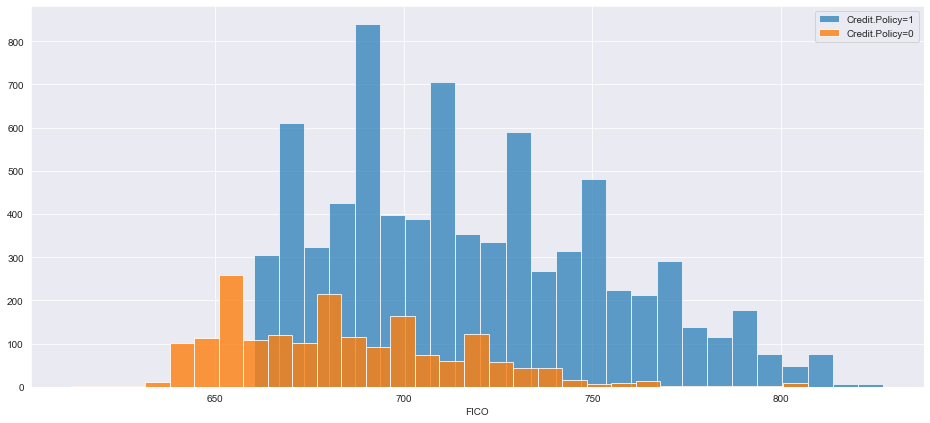

In [61]:
loan[loan['credit.policy']==1]['fico'].hist(alpha = 0.7,bins = 30, ec='white',figsize=(16,7),label='Credit.Policy=1')
loan[loan['credit.policy']==0]['fico'].hist(alpha = 0.8,bins = 30, ec='white',label='Credit.Policy=0')
plt.xlabel('FICO')
plt.legend()

In [26]:
loan['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

D:\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

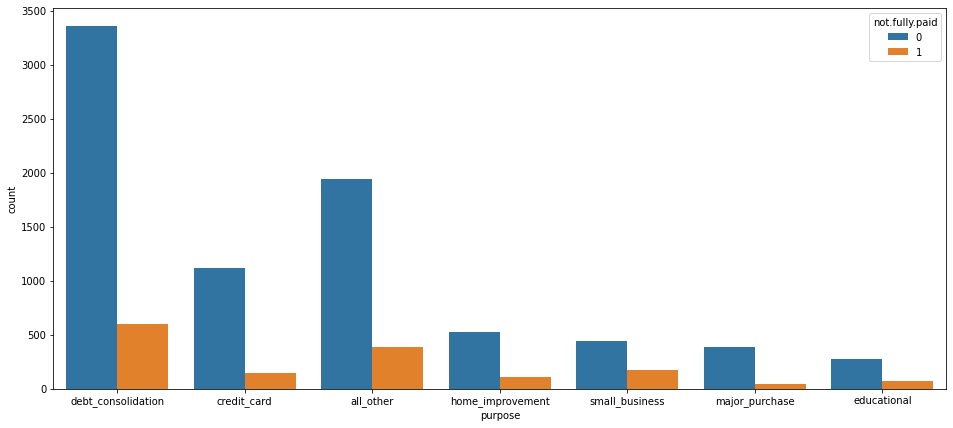

In [42]:
plt.figure(figsize=(16,7))
sns.countplot(loan['purpose'],hue=loan['not.fully.paid'])

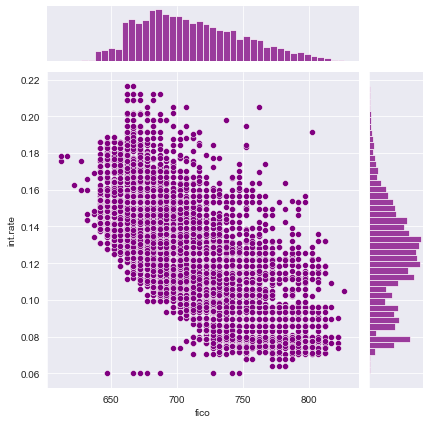

In [47]:
sns.set_style('darkgrid')
sns.jointplot(x='fico',y='int.rate',data=loan,color='purple')

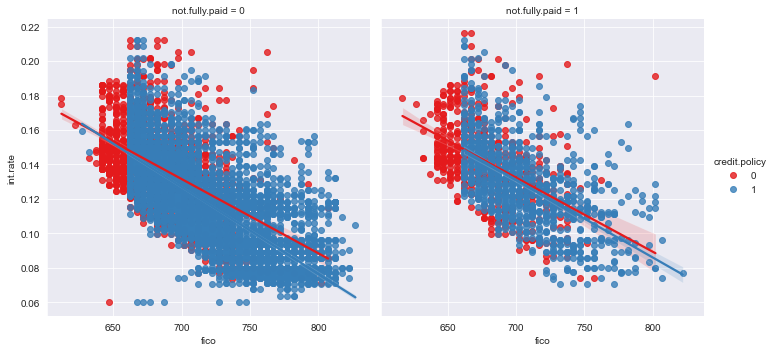

In [62]:
sns.lmplot(x = 'fico',y = 'int.rate',data = loan,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [55]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [58]:
loan_purp = pd.get_dummies(loan['purpose'],drop_first=True)

In [66]:
final_data = pd.concat([loan,loan_purp],axis=1)

In [78]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business'],
      dtype='object')

In [70]:
final_data.drop('purpose',axis=1,inplace=True)

In [71]:
from sklearn.model_selection import train_test_split

In [79]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtree = DecisionTreeClassifier()

In [83]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
prediction = dtree.predict(X_test)

In [85]:
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
y_test

5244    0
1739    0
2780    0
7062    0
6661    0
       ..
9508    0
4348    0
4233    0
5363    0
6599    0
Name: not.fully.paid, Length: 2874, dtype: int64

In [87]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test,prediction))
#prediction is  ok for not paid but not ok for paid

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [90]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rfc = RandomForestClassifier(600) #number of trees in the forest

In [101]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [102]:
pred = rfc.predict(X_test)

In [103]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
y_test

5244    0
1739    0
2780    0
7062    0
6661    0
       ..
9508    0
4348    0
4233    0
5363    0
6599    0
Name: not.fully.paid, Length: 2874, dtype: int64

In [105]:
print(classification_report(y_test,pred))
#much better report

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.69      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.77      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874

